In [28]:
import cellrank as cr
import scanpy as sc
import scvelo as scv

In [13]:
adata_gex

AnnData object with n_obs × n_vars = 16918 × 50
    obs: 'n_counts', 'sample', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'S_score', 'G2M_score', 'phase', 'proliferation', 'celltype', 'nCount_peaks', 'nFeature_peaks', 'time', 'apoptosis'
    layers: 'GEX_velocity', 'X_pca'

In [46]:
adata_gex = sc.read("/lustre/groups/ml01/workspace/monge_velo/multiome_pancreas/adata_gex_velocities.h5ad")
adata_gex.obsm["X_pca"] = adata_gex.layers["X_pca"].copy()
adata_gex.layers["velocity"] = adata_gex.layers["GEX_velocity"].copy()
sc.pp.neighbors(adata_gex, use_rep="X_pca")

In [47]:
adata_atac = sc.read("/lustre/groups/ml01/workspace/monge_velo/multiome_pancreas/adata_atac_velocities.h5ad")
adata_atac.obsm["X_lsi"] = adata_atac.layers["X_lsi"].copy()
adata_atac.layers["velocity"] = adata_atac.layers["ATAC_velocity"].copy()
sc.pp.neighbors(adata_atac, use_rep="X_lsi")

In [48]:
adata_joint = sc.read("/lustre/groups/ml01/workspace/monge_velo/multiome_pancreas/adata_joint_velocities.h5ad")
adata_joint.obsm["X_multi_vi"] = adata_joint.layers["X_multi_vi"].copy()
adata_joint.layers["velocity"] = adata_joint.layers["joint_velocity"].copy()
sc.pp.neighbors(adata_joint, use_rep="X_multi_vi")

In [49]:
adata_joint.obsm["X_umap_joint"] = adata_gex.obsm["umap_joint"].copy()
adata_joint.obsm["X_umap_GEX"] = adata_gex.obsm["umap_GEX"].copy()
adata_joint.obsm["X_umap_ATAC"] = adata_gex.obsm["umap_ATAC"].copy()

In [50]:
adata_atac.obsm["X_umap_joint"] = adata_gex.obsm["umap_joint"].copy()
adata_atac.obsm["X_umap_GEX"] = adata_gex.obsm["umap_GEX"].copy()
adata_atac.obsm["X_umap_ATAC"] = adata_gex.obsm["umap_ATAC"].copy()

In [55]:
vk_gex = cr.kernels.VelocityKernel(adata_gex, xkey="X_pca", vkey="GEX_velocity")
vk_gex.compute_transition_matrix()
adata_gex.uns["velocity_graph"] = vk_gex.transition_matrix

  0%|          | 0/16918 [00:00<?, ?cell/s]

  0%|          | 0/16918 [00:00<?, ?cell/s]

In [56]:
vk_atac = cr.kernels.VelocityKernel(adata_atac, xkey="X_lsi", vkey="ATAC_velocity")
vk_atac.compute_transition_matrix()
adata_atac.uns["velocity_graph"] = vk_atac.transition_matrix

  0%|          | 0/16918 [00:00<?, ?cell/s]

  0%|          | 0/16918 [00:00<?, ?cell/s]

In [57]:
vk_joint = cr.kernels.VelocityKernel(adata_joint, xkey="X_multi_vi", vkey="joint_velocity")
vk_joint.compute_transition_matrix()
adata_joint.uns["velocity_graph"] = vk_joint.transition_matrix

  0%|          | 0/16918 [00:00<?, ?cell/s]

  0%|          | 0/16918 [00:00<?, ?cell/s]

computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap_joint', embedded velocity vectors (adata.obsm)


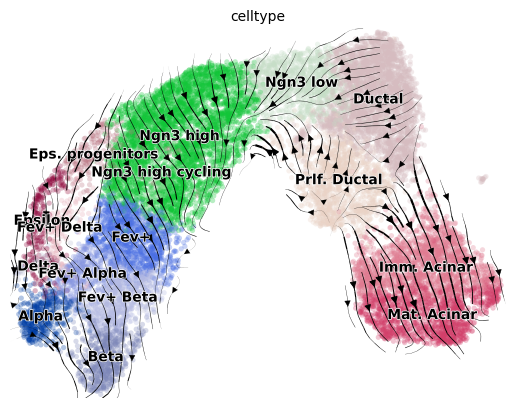

In [58]:
scv.pl.velocity_embedding_stream(adata_gex, basis="X_umap_joint", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_GEX', embedded velocity vectors (adata.obsm)


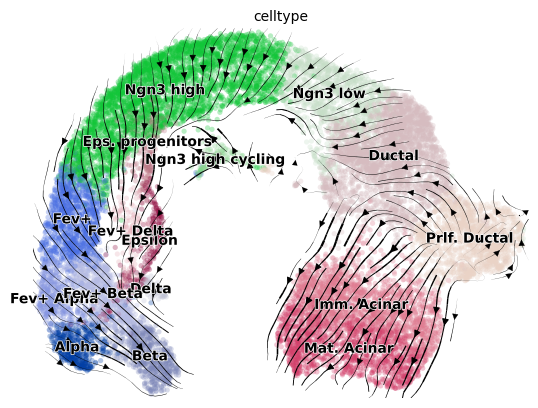

In [59]:
scv.pl.velocity_embedding_stream(adata_gex, basis="X_umap_GEX", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_ATAC', embedded velocity vectors (adata.obsm)


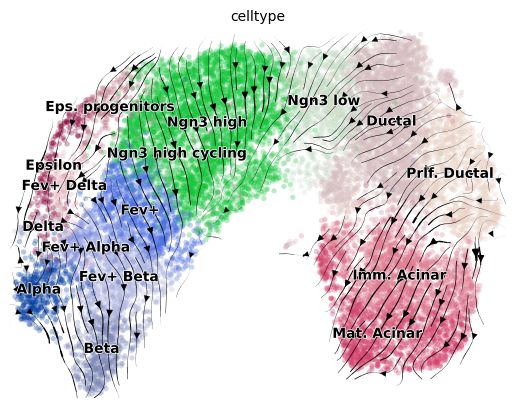

In [60]:
scv.pl.velocity_embedding_stream(adata_gex, basis="X_umap_ATAC", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_joint', embedded velocity vectors (adata.obsm)


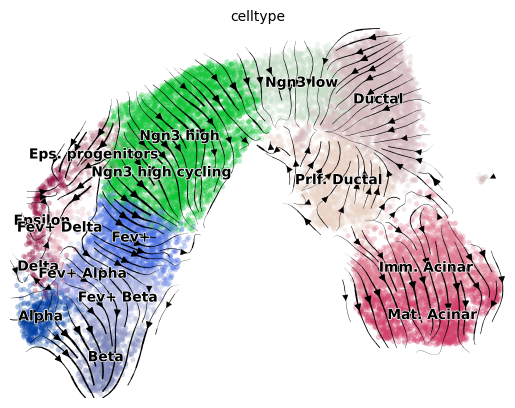

In [61]:
scv.pl.velocity_embedding_stream(adata_atac, basis="X_umap_joint", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_GEX', embedded velocity vectors (adata.obsm)


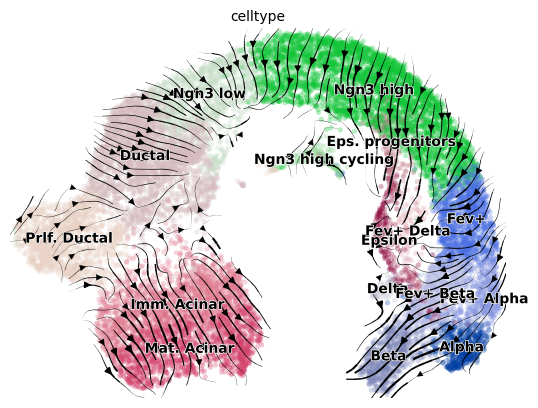

In [62]:
scv.pl.velocity_embedding_stream(adata_atac, basis="X_umap_GEX", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_ATAC', embedded velocity vectors (adata.obsm)


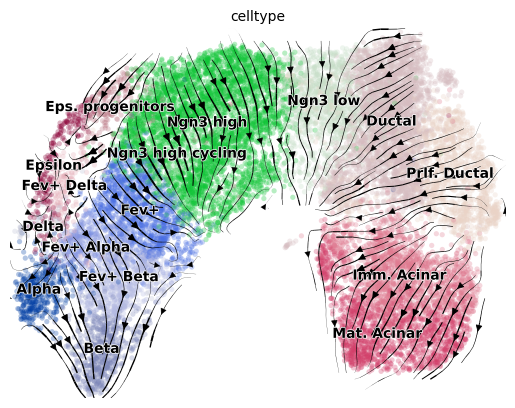

In [63]:
scv.pl.velocity_embedding_stream(adata_atac, basis="X_umap_ATAC", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_joint', embedded velocity vectors (adata.obsm)


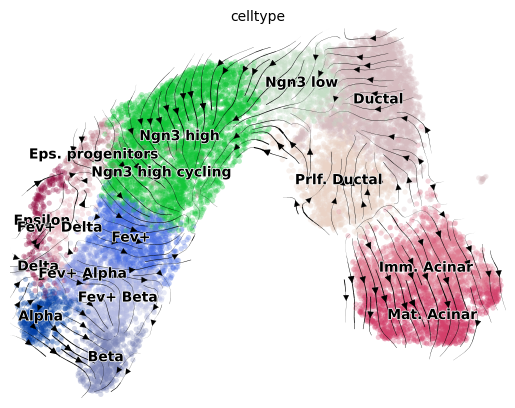

In [64]:
scv.pl.velocity_embedding_stream(adata_joint, basis="X_umap_joint", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_GEX', embedded velocity vectors (adata.obsm)


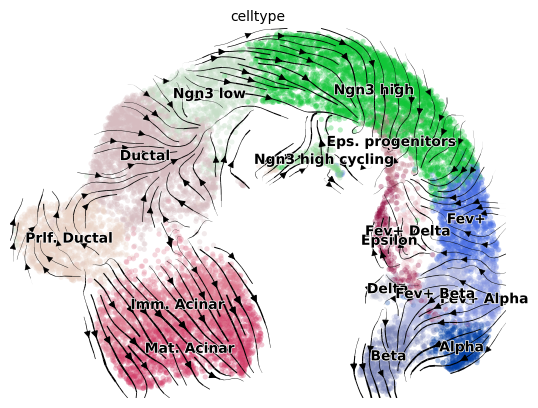

In [65]:
scv.pl.velocity_embedding_stream(adata_joint, basis="X_umap_GEX", color="celltype")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap_ATAC', embedded velocity vectors (adata.obsm)


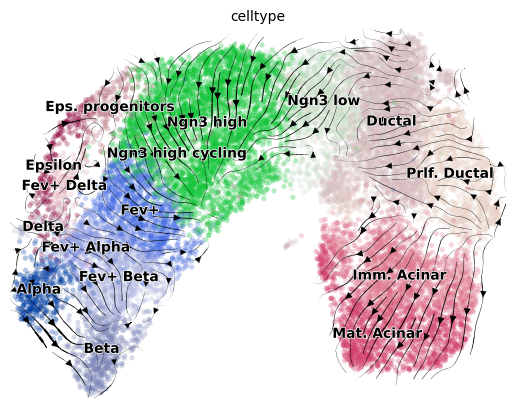

In [67]:
scv.pl.velocity_embedding_stream(adata_joint, basis="X_umap_ATAC", color="celltype")